# Interactive Example

In [1]:
import requests
import json
import pandas as pd
import os
import warnings
import numpy as np

In [2]:
# ADLOC_API_URL = "http://127.0.0.1:8000"
ADLOC_API_URL = "https://ai4eps-adloc.hf.space"


## 2. Prepare test data

- Download test data: PhaseNet picks of the 2019 Ridgecrest earthquake sequence
1. picks file: picks.json
2. station information: stations.csv
3. events in SCSN catalog: events.csv
4. config file: config.pkl

```bash
wget https://github.com/wayneweiqiang/GMMA/releases/download/test_data/test_data.zip
unzip test_data.zip
```

In [3]:
# !wget https://github.com/wayneweiqiang/GMMA/releases/download/test_data/test_data.zip
# !unzip test_data.zip

In [4]:
data_dir = lambda x: os.path.join("test_data", x)
station_csv = data_dir("stations.csv")
pick_json = data_dir("picks.json")
catalog_csv = data_dir("catalog_gamma.csv")
picks_csv = data_dir("picks_gamma.csv")
if not os.path.exists("figures"):
    os.makedirs("figures")
figure_dir = lambda x: os.path.join("figures", x)

## set config
config = {'xlim_degree': [-118.004, -117.004], 
          'ylim_degree': [35.205, 36.205],
          'z(km)': [0, 41]}

## read stations
stations = pd.read_csv(station_csv, delimiter="\t")
stations = stations.rename(columns={"station":"id"})
stations_json = json.loads(stations.to_json(orient="records"))

## read picks
picks = pd.read_json(pick_json).sort_values("timestamp").iloc[:200]
picks["timestamp"] = picks["timestamp"].apply(lambda x: x.isoformat(timespec='milliseconds'))
picks_json = json.loads(picks.to_json(orient="records"))


In [5]:
print(picks)

                id                timestamp      prob           amp type
51368  CI.WCS2..HH  2019-07-04T17:00:00.004  0.371902  1.576248e-06    p
50738   CI.WBM..BH  2019-07-04T17:00:00.004  0.429425  4.883445e-07    p
51254  CI.WCS2..BH  2019-07-04T17:00:00.004  0.570932  1.388111e-06    p
51643   CI.WMF..BH  2019-07-04T17:00:00.004  0.325480  1.930339e-07    p
51727   CI.WMF..HH  2019-07-04T17:00:00.004  0.499070  1.795238e-07    p
...            ...                      ...       ...           ...  ...
52664  CI.WRV2..EH  2019-07-04T17:05:13.634  0.565324  6.402773e-07    p
53676  PB.B918..EH  2019-07-04T17:05:13.754  0.621534  6.146262e-07    s
53083  CI.WVP2..HN  2019-07-04T17:05:13.894  0.891210  4.123632e-06    p
46727   CI.CCC..HN  2019-07-04T17:05:14.004  0.791852  5.821601e-06    s
46543   CI.CCC..HH  2019-07-04T17:05:14.004  0.827445  5.868008e-06    s

[200 rows x 5 columns]


In [6]:
picks.rename(columns={"id": "station_id", "timestamp": "phase_time", "prob": "phase_score", "amp": "phase_amplitude", "type": "phase_type"}, inplace=True)
stations.rename(columns={"id": "station_id"}, inplace=True)

In [7]:
picks["phase_time"] = pd.to_datetime(picks["phase_time"])
picks["timestamp"] = picks["phase_time"]
picks["phase_type"] = picks["phase_type"].str.upper()

In [8]:
picks = picks.merge(stations, on="station_id")

In [9]:
# picks = picks[(picks["timestamp"] > "2019-07-04T17:02:00.000Z") & (picks["timestamp"] < "2019-07-04T17:04:00.000Z")]
picks = picks[(picks["timestamp"] > pd.to_datetime("2019-07-04T17:02:00.000")) & (picks["timestamp"] < pd.to_datetime("2019-07-04T17:04:00.000"))]

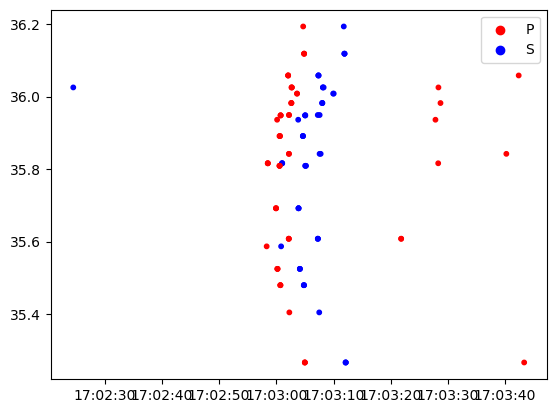

In [10]:
plt.figure()
# plt.scatter(picks["longitude"], picks["latitude"], c=picks["timestamp"], cmap="viridis")
color = {"P": "red", "S": "blue"}
plt.scatter(picks["timestamp"], picks["latitude"], c=picks["phase_type"].apply(lambda x: color[x]), s=10)
plt.scatter([], [], c="red", label="P")
plt.scatter([], [], c="blue", label="S")
plt.legend()
plt.show()

In [11]:
picks

,station_id,phase_time,phase_score,phase_amplitude,phase_type,timestamp,longitude,latitude,elevation(m),unit,component,response
1,CI.WCS2..HH,2019-07-04 17:03:02.664,0.948111,0.001982,P,2019-07-04 17:03:02.664,-117.765,36.025,1143.0,m/s,"E,N,Z","626910000.00,626910000.00,626838000.00"
2,CI.WCS2..HH,2019-07-04 17:03:08.144,0.753875,0.001982,S,2019-07-04 17:03:08.144,-117.765,36.025,1143.0,m/s,"E,N,Z","626910000.00,626910000.00,626838000.00"
4,CI.WBM..BH,2019-07-04 17:03:02.174,0.954165,0.002353,P,2019-07-04 17:03:02.174,-117.890,35.608,892.0,m/s,"E,N,Z","314573000.00,314573000.00,314573000.00"
5,CI.WBM..BH,2019-07-04 17:03:07.254,0.931752,0.002353,S,2019-07-04 17:03:07.254,-117.890,35.608,892.0,m/s,"E,N,Z","314573000.00,314573000.00,314573000.00"
6,CI.WBM..BH,2019-07-04 17:03:21.834,0.511648,0.000096,P,2019-07-04 17:03:21.834,-117.890,35.608,892.0,m/s,"E,N,Z","314573000.00,314573000.00,314573000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
194,CI.DTP..BH,2019-07-04 17:03:04.984,0.948384,0.000483,P,2019-07-04 17:03:04.984,-117.846,35.267,908.0,m/s,"E,N,Z","627368000.00,627368000.00,627368000.00"
195,CI.DTP..BH,2019-07-04 17:03:12.134,0.616461,0.000483,S,2019-07-04 17:03:12.134,-117.846,35.267,908.0,m/s,"E,N,Z","627368000.00,627368000.00,627368000.00"
196,CI.DTP..HN,2019-07-04 17:03:04.984,0.967691,0.000484,P,2019-07-04 17:03:04.984,-117.846,35.267,908.0,m/s**2,"E,N,Z","214399.00,213971.00,214484.00"
197,CI.DTP..HN,2019-07-04 17:03:12.154,0.672017,0.000484,S,2019-07-04 17:03:12.154,-117.846,35.267,908.0,m/s**2,"E,N,Z","214399.00,213971.00,214484.00"


In [12]:
# stations.rename(columns={"elevation(m)", "elevation_m"}, inplace=True)
stations.rename(columns={"elevation(m)": "elevation_m"}, inplace=True)


In [13]:
picks

,station_id,phase_time,phase_score,phase_amplitude,phase_type,timestamp,longitude,latitude,elevation(m),unit,component,response
1,CI.WCS2..HH,2019-07-04 17:03:02.664,0.948111,0.001982,P,2019-07-04 17:03:02.664,-117.765,36.025,1143.0,m/s,"E,N,Z","626910000.00,626910000.00,626838000.00"
2,CI.WCS2..HH,2019-07-04 17:03:08.144,0.753875,0.001982,S,2019-07-04 17:03:08.144,-117.765,36.025,1143.0,m/s,"E,N,Z","626910000.00,626910000.00,626838000.00"
4,CI.WBM..BH,2019-07-04 17:03:02.174,0.954165,0.002353,P,2019-07-04 17:03:02.174,-117.890,35.608,892.0,m/s,"E,N,Z","314573000.00,314573000.00,314573000.00"
5,CI.WBM..BH,2019-07-04 17:03:07.254,0.931752,0.002353,S,2019-07-04 17:03:07.254,-117.890,35.608,892.0,m/s,"E,N,Z","314573000.00,314573000.00,314573000.00"
6,CI.WBM..BH,2019-07-04 17:03:21.834,0.511648,0.000096,P,2019-07-04 17:03:21.834,-117.890,35.608,892.0,m/s,"E,N,Z","314573000.00,314573000.00,314573000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
194,CI.DTP..BH,2019-07-04 17:03:04.984,0.948384,0.000483,P,2019-07-04 17:03:04.984,-117.846,35.267,908.0,m/s,"E,N,Z","627368000.00,627368000.00,627368000.00"
195,CI.DTP..BH,2019-07-04 17:03:12.134,0.616461,0.000483,S,2019-07-04 17:03:12.134,-117.846,35.267,908.0,m/s,"E,N,Z","627368000.00,627368000.00,627368000.00"
196,CI.DTP..HN,2019-07-04 17:03:04.984,0.967691,0.000484,P,2019-07-04 17:03:04.984,-117.846,35.267,908.0,m/s**2,"E,N,Z","214399.00,213971.00,214484.00"
197,CI.DTP..HN,2019-07-04 17:03:12.154,0.672017,0.000484,S,2019-07-04 17:03:12.154,-117.846,35.267,908.0,m/s**2,"E,N,Z","214399.00,213971.00,214484.00"


In [14]:
from app import run_adloc

Eikonal Solver: 
Iter 0, error = 999.937
Iter 1, error = 0.000
Time: 1.465
Eikonal Solver: 
Iter 0, error = 999.879
Iter 1, error = 0.000
Time: 0.132


In [28]:
# call loalhost:8000/predict
picks_  = picks.copy()
picks_.drop(columns=["timestamp", "latitude", "longitude", "elevation(m)", "unit", "component", "response"], inplace=True, errors="ignore")
picks_["phase_time"] = picks_["phase_time"].apply(lambda x: x.isoformat())
stations_ = stations.copy()
stations_.drop(columns=["component", "unit", "response"], inplace=True, errors="ignore")
picks_ = picks_.to_dict(orient="records")
stations_ = stations.to_dict(orient="records")

response = requests.post(f"{ADLOC_API_URL}/predict/", json={"stations": {"data": stations_}, "picks": {"data":picks_}, "config": config})

if response.status_code == 200:
    result = response.json()
    # Process the result as needed
else:
    print(f"Request failed with status code: {response.status_code}")
    print(f"Error message: {response.text}")

In [29]:
print(result["events"])

[{'time': '2019-07-04T17:02:55.148997891', 'adloc_score': 0.9949417759865846, 'adloc_residual_time': 0.1954572041180674, 'num_picks': 98, 'event_index': 0, 'longitude': -117.49587738034006, 'latitude': 35.70909578500428, 'depth_km': 0.0}]


In [ ]:
raise

In [ ]:
config["region"] = "Ridgecrest"
config["event_index"] = 1

picks_, events_ = run_adloc(picks, stations, config)

In [ ]:
picks_ = pd.DataFrame(picks_)

In [ ]:
plt.figure()
idx = picks_["adloc_mask"] == 1
plt.scatter(picks_[idx]["timestamp"], picks_[idx]["latitude"], c=picks_[idx]["phase_type"].apply(lambda x: color[x]), s=10)

In [ ]:
events_